In [2]:
from keras.datasets import reuters
 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [13]:
#preparing data
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
#one hot encode
from keras.utils.np_utils import to_categorical
 
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)
print(one_hot_train_labels)

(8982, 46)
(2246, 46)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
# Set a validation set
x_val = x_train[:1000]
x_train2 = x_train[1000:]
y_val = one_hot_train_labels[:1000]
y_train2 = one_hot_train_labels[1000:]

print(x_val.shape)
print(y_val.shape)
print(x_train2.shape)
print(y_train2.shape)

(1000, 10000)
(1000, 46)
(7982, 10000)
(7982, 46)


In [16]:
#network architecture
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

#network compile
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
#network training
history = network.fit(x_train2, y_train2, batch_size=512, epochs=20, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 479us/step - loss: 2.7132 - accuracy: 0.5164 - val_loss: 1.7962 - val_accuracy: 0.6260
Epoch 2/20
7982/7982 [==============================] - 3s 348us/step - loss: 1.4595 - accuracy: 0.6959 - val_loss: 1.3155 - val_accuracy: 0.7070
Epoch 3/20
7982/7982 [==============================] - 3s 334us/step - loss: 1.0620 - accuracy: 0.7694 - val_loss: 1.1746 - val_accuracy: 0.7400
Epoch 4/20
7982/7982 [==============================] - 3s 345us/step - loss: 0.8383 - accuracy: 0.8206 - val_loss: 1.0367 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 4s 466us/step - loss: 0.6646 - accuracy: 0.8629 - val_loss: 0.9685 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 3s 358us/step - loss: 0.5313 - accuracy: 0.8914 - val_loss: 0.9262 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 4s 463us/step - los

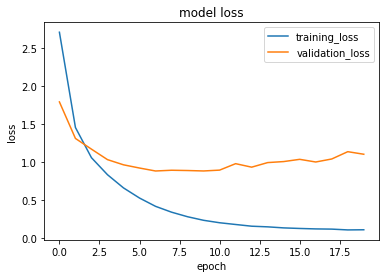

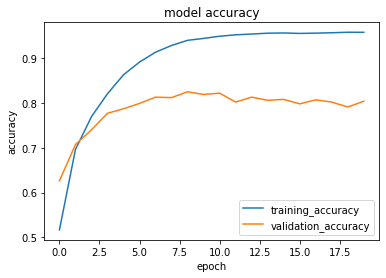

In [19]:
import matplotlib.pyplot as plt

#TODO: plot
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

#exercises
Task 1 : After 8th epoch, we can see on the model loss graph, the numbers of training loss are getting decrease and the validation loss higher than training loss and values remain the same, it means this model has an overfitting. 
And from model accuracy graph, the training accuracy is increase and higher than validation accuracy which has values remain not changes and slightly decrease until the end of epoch, we can say this model has bad performance.

In [20]:
#network second training
history2 = network.fit(x_train2, y_train2, batch_size=512, epochs=8, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 4s 450us/step - loss: 0.1084 - accuracy: 0.9587 - val_loss: 1.3206 - val_accuracy: 0.7650
Epoch 2/8
7982/7982 [==============================] - 4s 454us/step - loss: 0.1053 - accuracy: 0.9578 - val_loss: 1.1920 - val_accuracy: 0.7970
Epoch 3/8
7982/7982 [==============================] - 4s 459us/step - loss: 0.1092 - accuracy: 0.9575 - val_loss: 1.1469 - val_accuracy: 0.8040
Epoch 4/8
7982/7982 [==============================] - 3s 422us/step - loss: 0.1027 - accuracy: 0.9563 - val_loss: 1.1792 - val_accuracy: 0.7940
Epoch 5/8
7982/7982 [==============================] - 3s 350us/step - loss: 0.1043 - accuracy: 0.9577 - val_loss: 1.1271 - val_accuracy: 0.7970
Epoch 6/8
7982/7982 [==============================] - 3s 338us/step - loss: 0.1005 - accuracy: 0.9577 - val_loss: 1.1336 - val_accuracy: 0.8080
Epoch 7/8
7982/7982 [==============================] - 3s 335us/step - loss: 0.103

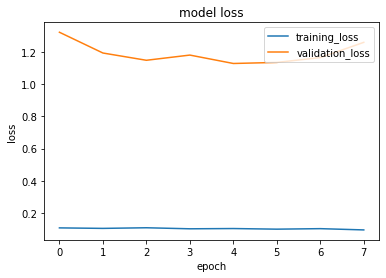

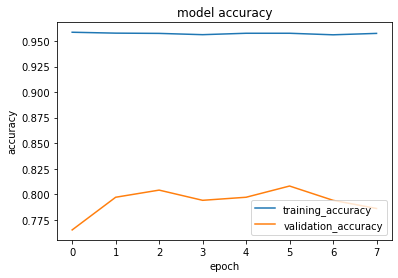

In [21]:
#Plot2
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

Task 2 : If the network setting only has 8 epochs, from model loss graph we can see the training results have the same values from start to end of epochs, which is mean the training doesn't improve, so it needs to have more training by increasing the number of epochs. Because of the training result not good, so it may cause bad result also for validation (validation loss high and accuracy low).

In [22]:
#train second network architecture with intermediate layer 4
from keras import models
from keras import layers
 
network2 = models.Sequential()
network2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
network2.add(layers.Dense(4, activation='relu'))
network2.add(layers.Dense(46, activation='softmax'))

#network compile
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
#network training
history3 = network2.fit(x_train2, y_train2, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 326us/step - loss: 3.7862 - accuracy: 0.0381 - val_loss: 3.7317 - val_accuracy: 0.0350
Epoch 2/20
7982/7982 [==============================] - 2s 241us/step - loss: 3.6710 - accuracy: 0.0329 - val_loss: 3.6092 - val_accuracy: 0.0290
Epoch 3/20
7982/7982 [==============================] - 2s 232us/step - loss: 3.5292 - accuracy: 0.0570 - val_loss: 3.4643 - val_accuracy: 0.0850
Epoch 4/20
7982/7982 [==============================] - 2s 241us/step - loss: 3.3680 - accuracy: 0.2295 - val_loss: 3.3048 - val_accuracy: 0.3600
Epoch 5/20
7982/7982 [==============================] - 2s 244us/step - loss: 3.1970 - accuracy: 0.3618 - val_loss: 3.1371 - val_accuracy: 0.3650
Epoch 6/20
7982/7982 [==============================] - 2s 237us/step - loss: 3.0166 - accuracy: 0.3622 - val_loss: 2.9596 - val_accuracy: 0.3590
Epoch 7/20
7982/7982 [==============================] - 2s 239us/step - loss

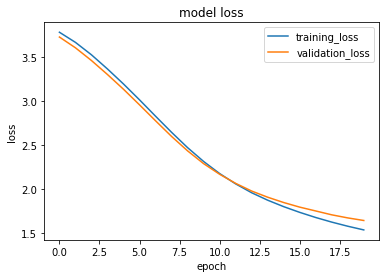

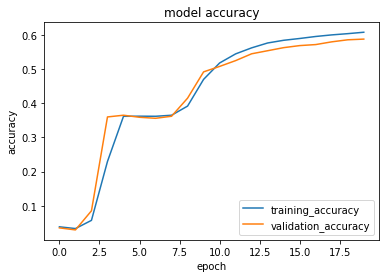

In [24]:
#Plot3
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
plt.show()

Task 3 : From the 3rd graph shows, if we set intermediate layer in 4 numbers, the validation loss value is slightly similar or higher than training loss, and the validation accuracy lower than training accuracy. On this case the model is fine because it has low loss and high accuracy, so I think it not necessary to have more numbers of intermediate layer. 